# Easy21 assignment
# Computational Intelligence (REI101M fall 2018)
# University of Iceland

Include code for the assignment and other imports

In [1]:
import easy21 as e
import numpy as np
import matplotlib.pyplot as plt

Run Monty Carlo over 100k episodes (returns the learned Q function)  
Q\[player_hand, dealer_hand, action\] (Q\[0,0,:\] is unused)

In [2]:
MC_Q = e.MonteCarlo(int(1e5))

The optimal value function from this Q is $V^*(s) = \max_a Q(s,a) $

In [3]:
Vstar = np.max(MC_Q[1:,1:,:],axis=2)

Plot this value function 

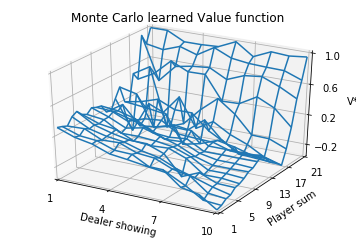

In [4]:
e.wirePlot(Vstar, "Monte Carlo learned Value function")

Run Sarsa($\lambda$) with $\lambda=0.5$ over 100k episodes 

In [5]:
TD_Q = e.Sarsa(int(1e5), 0.5)

Plot the learned value function

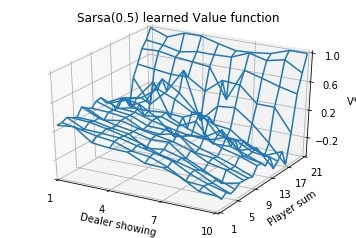

In [6]:
Vstar = np.max(TD_Q[1:,1:,:],axis=2)
e.wirePlot(Vstar, "Sarsa(0.5) learned Value function")

Run the Sarsa($\lambda$) with parameter values $\lambda \in \{0, 0.1, 0.2, . . . , 1\}$.  
Stop each run after 1000 episodes and report the mean-squared error
$$\sum_{s,a}(Q(s,a)-Q^*(s,a))^2$$

In [7]:
    lambdas = np.arange(0,1,.1)
    MSE = np.zeros(lambdas.shape)
    for i,lambd in enumerate(lambdas):
        TD_Q = e.Sarsa(1000, lambd)
        se = (TD_Q-MC_Q)**2
        MSE[i] = se.sum()

Check MSE values calculated

In [8]:
MSE

array([ 95.55264236,  99.65050079, 105.92658178, 103.62320244,
       101.03512089, 116.87766255,  99.86113342, 123.58028267,
       116.33571262, 172.88122069])

Plot the mean-squared error against $\lambda$

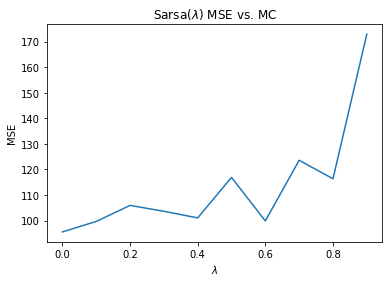

In [9]:
    plt.plot(lambdas,MSE)
    plt.title(r"Sarsa($\lambda$) MSE vs. MC")
    plt.xlabel(r'$\lambda$')
    plt.ylabel('MSE')
    plt.show()

For $\lambda = 0$ and $\lambda = 1$ plot the learning
curve of mean-squared error against episode number.

Text(0,0.5,'Sarsa(1) MSE')

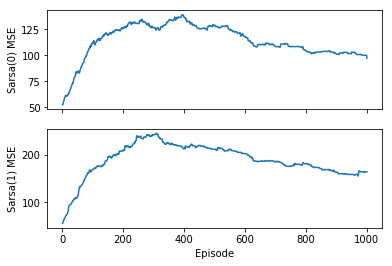

In [10]:
Q0, MSE0 = e.Sarsa(1000, 0, returnMSEhistoryQ=MC_Q)
Q1, MSE1 = e.Sarsa(1000, 1, returnMSEhistoryQ=MC_Q)
episode = np.arange(1,MSE0.shape[0]+1)

ax1 = plt.subplot(211)
ax1.plot(episode,MSE0)
plt.ylabel('Sarsa(0) MSE')
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(episode,MSE1)
plt.xlabel("Episode")
plt.ylabel('Sarsa(1) MSE')

## Run the complete script.  
Q's are saved to a .npy file and if the script is rerun with the same parameters it loads them instead of training.  Figures are saved to PDF.
```python
main(MC_numEpisodes = int(1e5), TD_nEpisodes = int(1e5), 
     TD_lambda = 0.5, TD_MSE_num_episodes = int(1e3) )

MC_numEpisodes      # Number of episodes of training for Monte Carlo
TD_nEpisodes        # Number of episodes of training for Sarsa(λ) (Only for first run)
TD_lambda           # λ for Sarsa(λ) training (Only for first run)
TD_MSE_num_episodes # Number of episodes for training while calculating MSE (10 runs of Sarsa training)
```

MC_Q_1e+08.npy loaded from last run!
Sarsa(0.5)_Q_1e+08.npy loaded from last run!


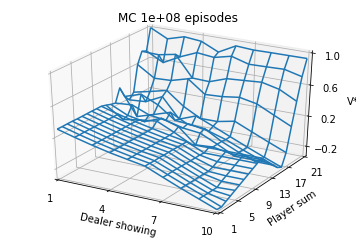

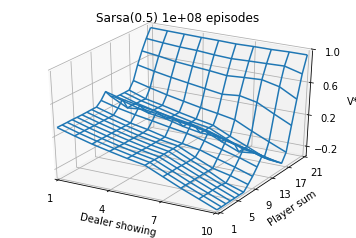

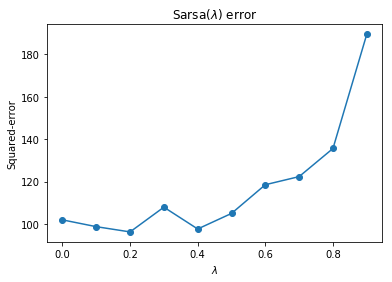

<Figure size 432x288 with 0 Axes>

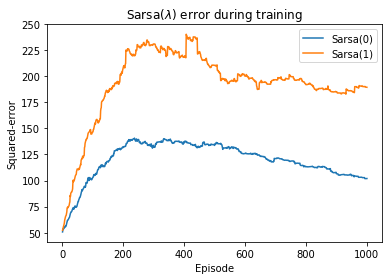

<Figure size 432x288 with 0 Axes>

In [11]:
e.main(MC_numEpisodes = int(1e8), TD_numEpisodes = int(1e8), TD_lambda = 0.5, TD_MSE_num_episodes = int(1e3))